In [1]:
#import libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import os 


In [2]:
#read the data
house = pd.read_csv('train.csv')

In [3]:
#create another copy
housing = house.copy(deep= True)

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing.shape

(1460, 81)

In [8]:
#To find null values for in every column
housing.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [9]:
#Validate the data
housing['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [10]:
housing['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [11]:
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
##as it looks like all the three parameters have NAN or null values, hence we can drip them
housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis =1, inplace = True)

In [13]:
#check the null value percentage
round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
                ...  
BsmtUnfSF        0.00
TotalBsmtSF      0.00
MSSubClass       0.00
HeatingQC        0.00
SalePrice        0.00
Length: 77, dtype: float64

In [14]:
#check the arrangement of 'FireplaceQu'
housing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [15]:
##As there is no null values in fireplace coulmn, we can consider this parameter for rows of missing values
housing['FireplaceQu'] = housing['FireplaceQu'].replace(np.nan, 'NA')


In [16]:
housing['FireplaceQu'].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [17]:
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

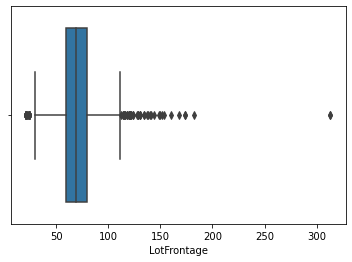

In [18]:
#To check the outliers
sns.boxplot('LotFrontage', data = housing)

In [19]:
##since there are outliers shown in above pictiure for "lotFrontage", we will insert the missing values in this column
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())

In [20]:
housing['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [21]:
import datetime as d
current_year = int(d.datetime.now().year)

In [22]:
housing['GarageYrBlt'] = current_year-housing['GarageYrBlt']

<AxesSubplot:xlabel='GarageYrBlt'>

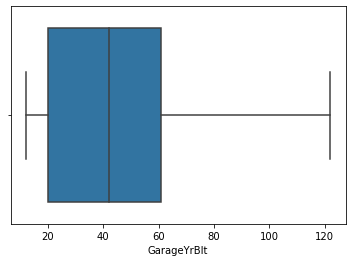

In [23]:
#To check outliers in this column
sns.boxplot('GarageYrBlt', data = housing)

In [24]:
#As there are no outliers, we can use the date with mean of the age
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mean())

In [25]:
#calculate number of years of house was sold from current year
housing['YrSold'] = current_year-housing['YrSold']

In [26]:
#calculating number of years a house was built
housing['YearBuilt'] = current_year-housing['YearBuilt']

In [27]:
housing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [28]:
#we reaplace NAN value to Na
housing['GarageType'] = housing['GarageType']. replace(np.nan, 'NA')

In [29]:
housing['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [30]:
#we replace NAN values to NA 
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'NA')


In [31]:
housing['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [32]:
#we replace NAN values to NA 
housing['GarageQual'] = housing['GarageCond'].replace(np.nan, 'NA')

In [33]:
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'NA')

In [34]:
housing['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [35]:
#replacing values from NAN to NA
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'NA')

In [36]:
housing['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [37]:
#Replacing NaN values to NA
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'NA')

In [38]:
housing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [39]:
#Replacing Nan values
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'NA')

In [40]:
housing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='MasVnrArea'>

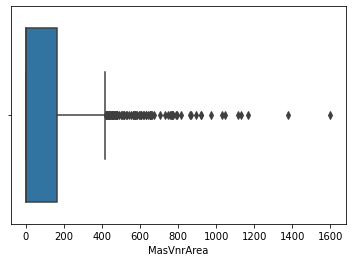

In [41]:
#Replacing Nan Values
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'NA')
sns.boxplot('MasVnrArea', data = housing)

In [42]:
housing['MasVarArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())

In [43]:
housing['MasVnrArea'].isnull().sum()


8

In [44]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [45]:
housing['MasVnrType'].mode()


0    None
dtype: object

In [46]:
#Replace mode
housing['MasVnrType']= housing['MasVnrType'].replace(np.nan, 'None')

In [47]:
housing['MasVnrType'].isnull().sum()

0

In [48]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [49]:
housing['Electrical'] = housing['Electrical'].replace(np.nan, 'SBrkr')

In [50]:
#Check null values in dataframe 'Housing' 
round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)

BsmtFinType2    2.60
BsmtFinType1    2.53
MasVnrArea      0.55
Id              0.00
BedroomAbvGr    0.00
                ... 
MasVnrType      0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
MasVarArea      0.00
Length: 78, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

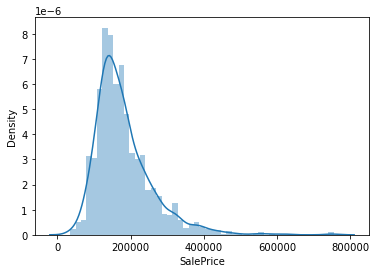

In [51]:
#To check "SalePrice" if distributed to apply regression
sns.distplot(housing['SalePrice'])

In [52]:
housing.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [53]:
housing['log_value'] = np.log(housing['SalePrice'])

<AxesSubplot:xlabel='log_value', ylabel='Density'>

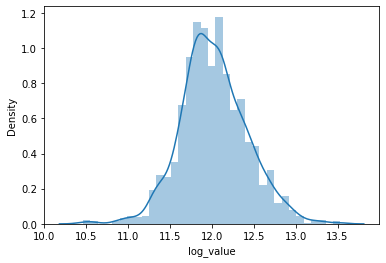

In [54]:
sns.distplot(housing['log_value'])

In [55]:
housing['MSSubClass'] = housing['MSSubClass'].astype(object)

In [56]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [57]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVarArea,log_value
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,14,WD,Normal,208500,196.0,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,15,WD,Normal,181500,0.0,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,9,14,WD,Normal,223500,162.0,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,2,16,WD,Abnorml,140000,0.0,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,12,14,WD,Normal,250000,350.0,12.429216


In [58]:
# As these volumns have variance of similar values

In [59]:
#(housing['Heating'].value_counts()/len(housing.index))*100 #Can remove no much of a variance : 97 % for GasA
#(housing['SaleCondition'].value_counts()/len(housing.index))*100 #Can remove : 82% varaiance for Normal
#(housing['CentralAir'].value_counts()/len(housing.index))*100 #Can remove : 93.5% varaiance for Y
#(housing['LowQualFinSF'].value_counts()/len(housing.index))*100 #Can remove : 98.2% varaiance for 0
#(housing['KitchenAbvGr'].value_counts()/len(housing.index))*100 #Can remove : 95.3% varaiance for 1
#(housing['Functional'].value_counts()/len(housing.index))*100 #Can remove : 93.1% varaiance for Typ
#(housing['SaleType'].value_counts()/len(housing.index))*100 #Can remove : 86% varaiance for WD
#MoSold might not be a highly influential factor so we can drop it
#(housing['MiscVal'].value_counts()/len(housing.index))*100 #Can remove : 96% varaiance for 0 
#(housing['PoolArea'].value_counts()/len(housing.index))*100 #Can remove : 99% varaiance for 0 
#(housing['ScreenPorch'].value_counts()/len(housing.index))*100 #Can remove : 92% varaiance for 0 
#(housing['3SsnPorch'].value_counts()/len(housing.index))*100 #Can remove : 98% varaiance for 0
#(housing['PavedDrive'].value_counts()/len(housing.index))*100 #Can remove : 92% varaiance for Y
#(housing['PavedDrive'].value_counts()/len(housing.index))*100 #Can remove : 92% varaiance for Y
#(housing['EnclosedPorch'].value_counts()/len(housing.index))*100 #Can remove : 86% varaiance for Y
#(housing['BsmtFinSF2'].value_counts()/len(housing.index))*100 #Can remove : 88% varaiance for 0
#(housing['Condition2'].value_counts()/len(housing.index))*100 #Can remove : 98% varaiance for Norm
#(housing['BldgType'].value_counts()/len(housing.index))*100 #Can remove : 84% varaiance for 1Fam
#(housing['RoofStyle'].value_counts()/len(housing.index))*100 #Can remove : 78% varaiance for Gable
#(housing['RoofMatl'].value_counts()/len(housing.index))*100 #Can remove : 98% varaiance for CompShg
#(housing['ExterCond'].value_counts()/len(housing.index))*100 #Can remove : 87% varaiance for TA
#(housing['Utilities'].value_counts()/len(housing.index))*100 #Can remove : 99.9% varaiance for AllPub
#(housing['Electrical'].value_counts()/len(housing.index))*100 #Can remove : 99.9% varaiance for SBrkr
#(housing['BsmtCond'].value_counts()/len(housing.index))*100 #Can remove : 90% varaiance for TA
#(housing['BsmtFinType2'].value_counts()/len(housing.index))*100 #Can remove : 90% varaiance for Unf
#(housing['GarageQual'].value_counts()/len(housing.index))*100 #Can remove : 89% varaiance for TA
#(housing['GarageCond'].value_counts()/len(housing.index))*100 #Can remove : 90% varaiance for TA
#'Heating','SaleCondition', 'CentralAir', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'SaleType', 'MoSold', 'MiscVal', 'PoolArea', 
#'ScreenPorch', '3SsnPorch', 'PavedDrive', 'EnclosedPorch', 'BsmtFinSF2', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 
#'ExterCond', 'Utilities', 'Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond'

In [60]:
house.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [61]:
housing.drop(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'HouseStyle', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st','Exterior2nd', 'MasVnrType', 'MasVnrArea'], axis =1, inplace = True)


In [62]:
housing.columns

Index(['Utilities', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'MasVarArea', 'log_value'],
      dtype='object')

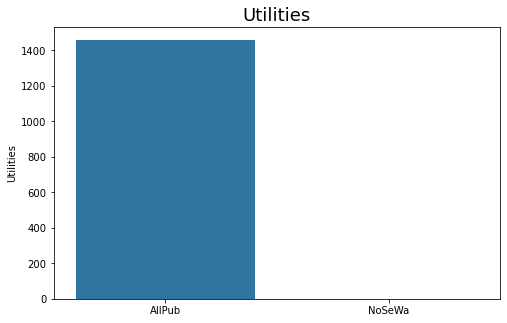

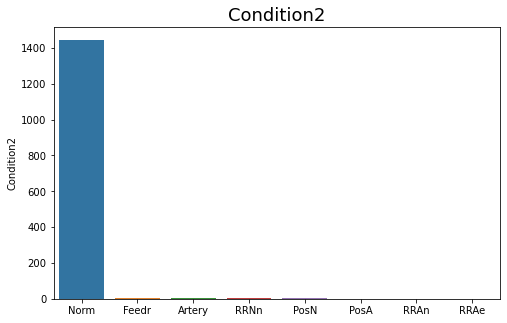

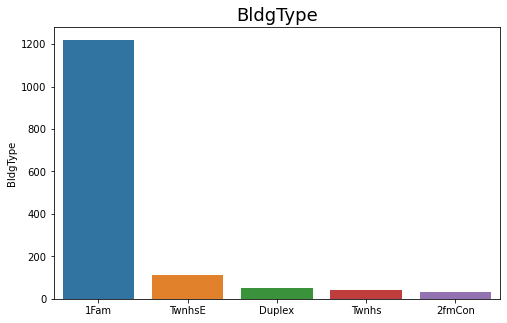

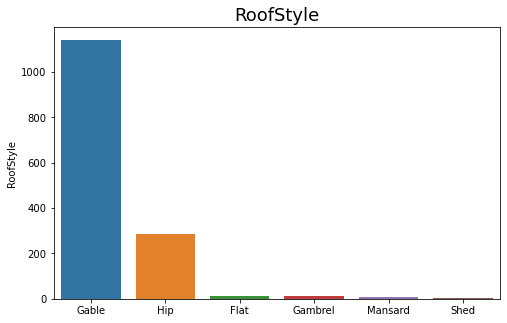

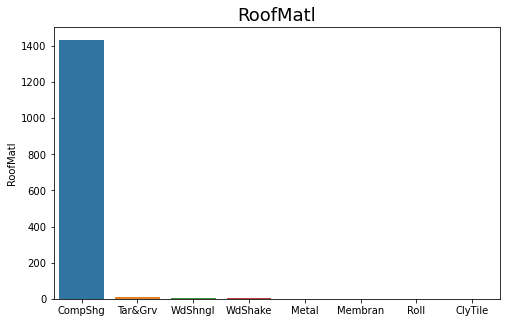

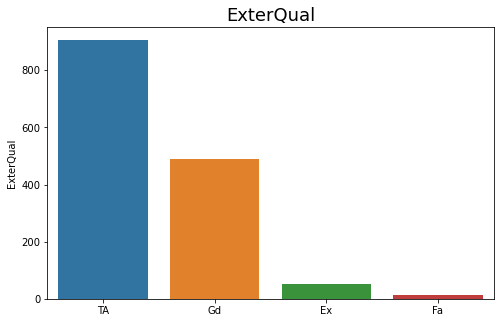

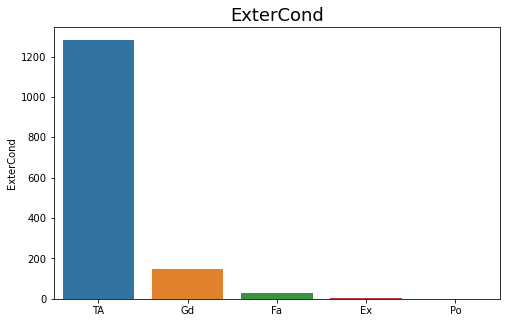

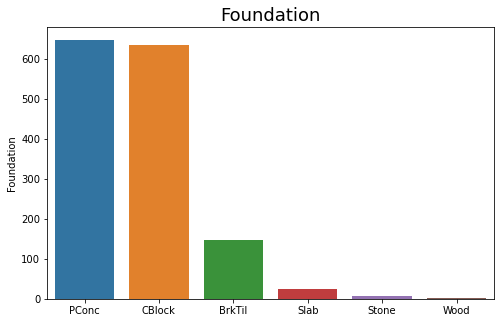

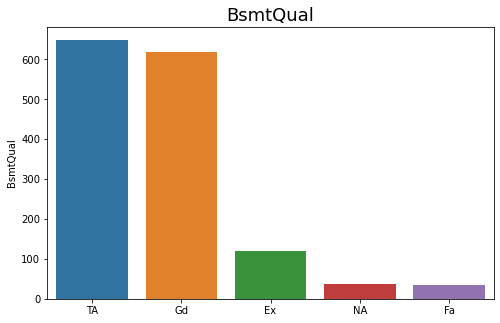

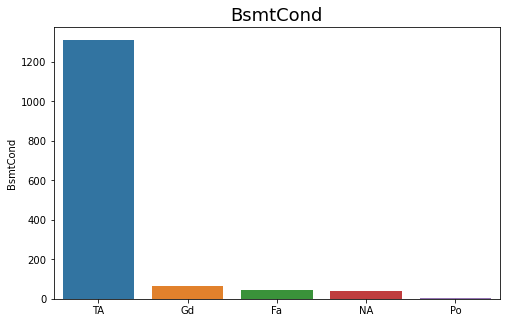

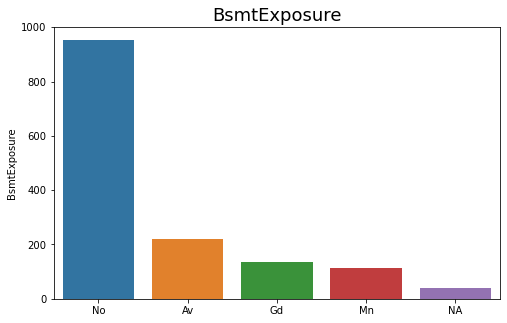

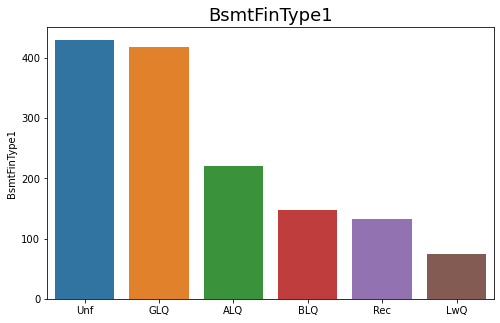

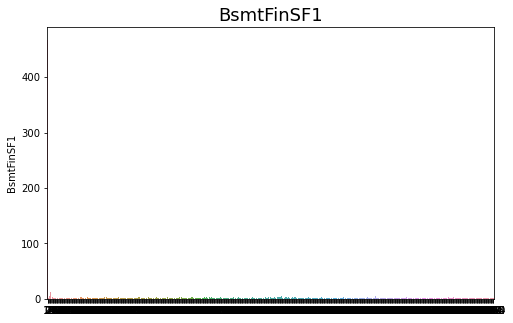

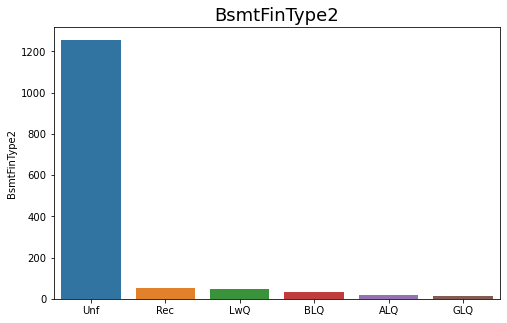

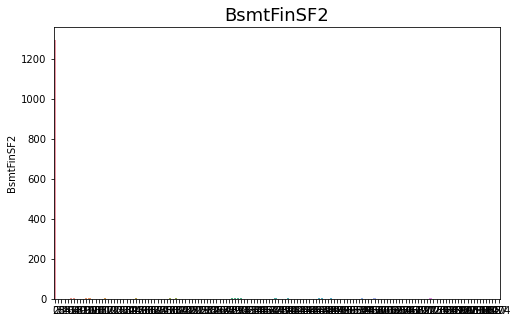

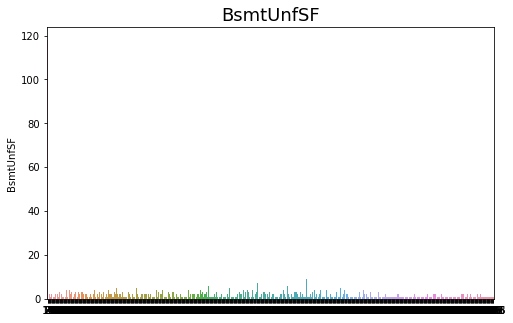

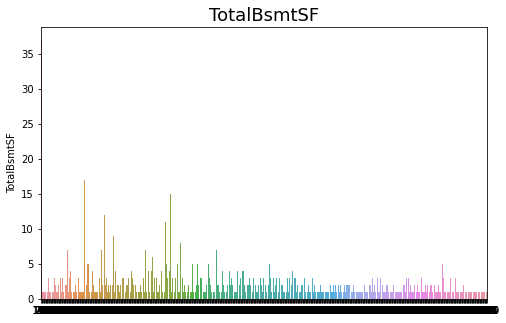

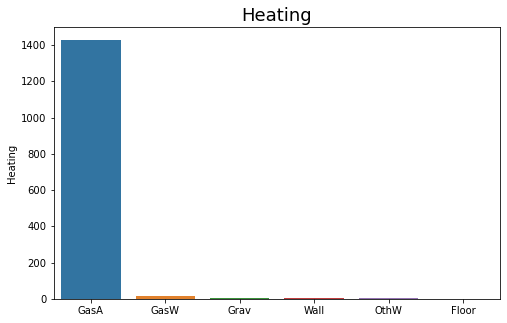

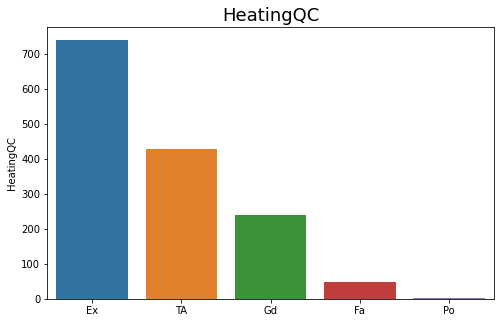

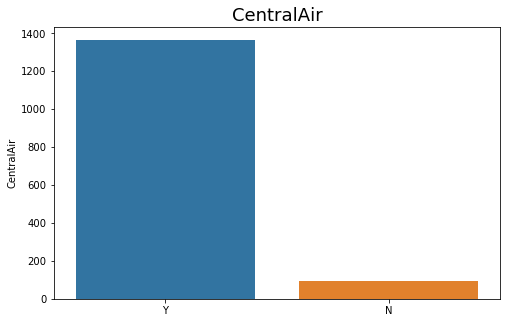

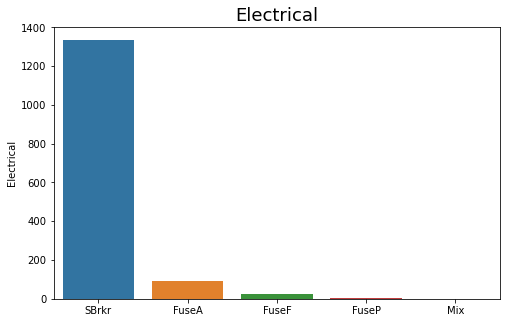

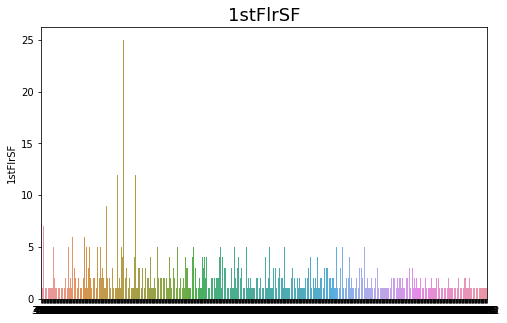

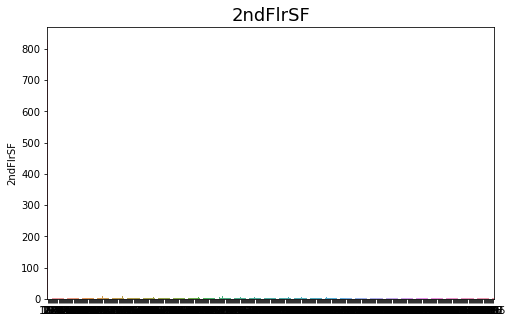

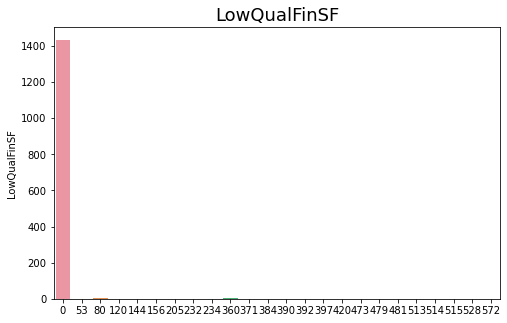

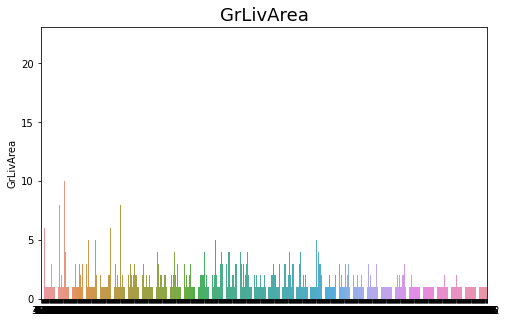

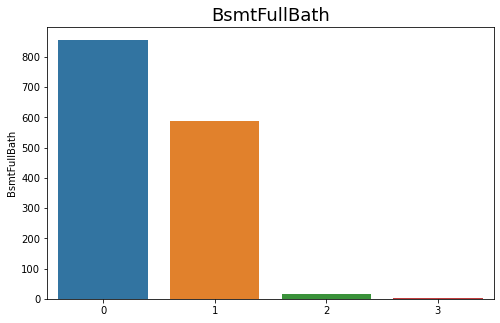

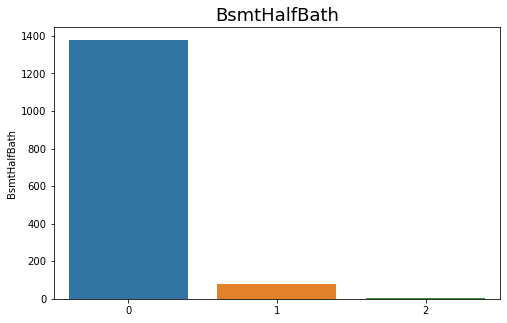

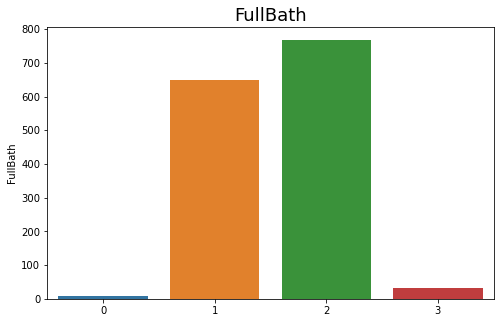

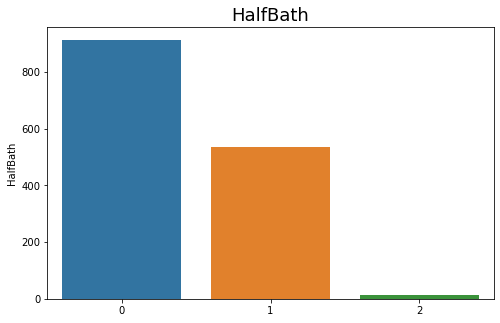

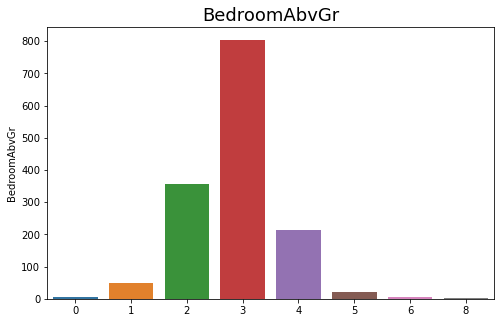

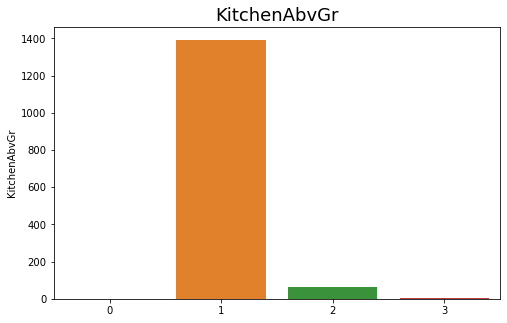

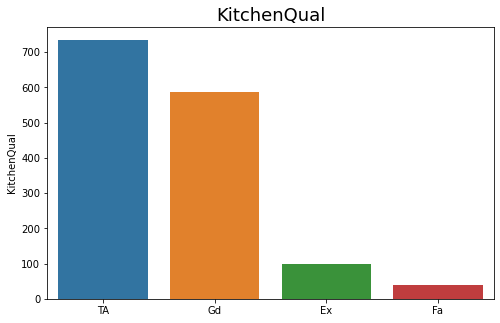

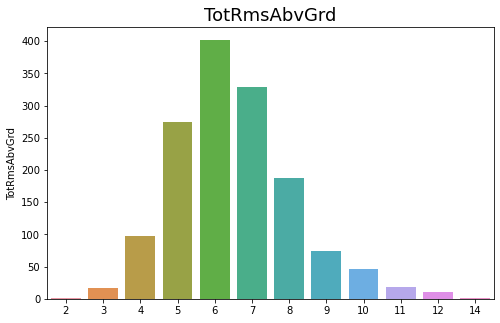

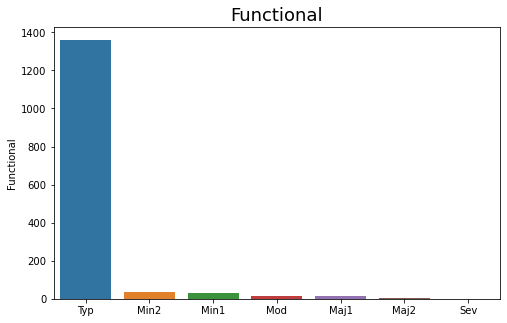

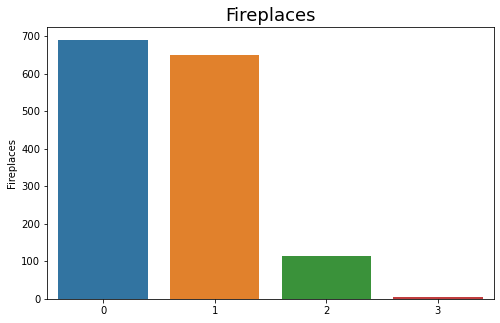

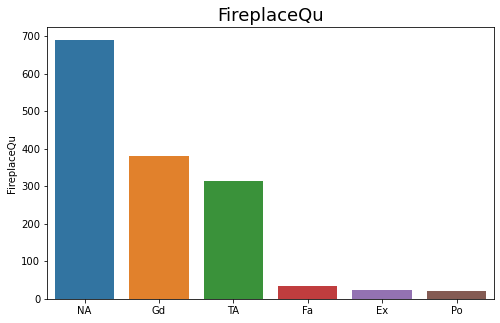

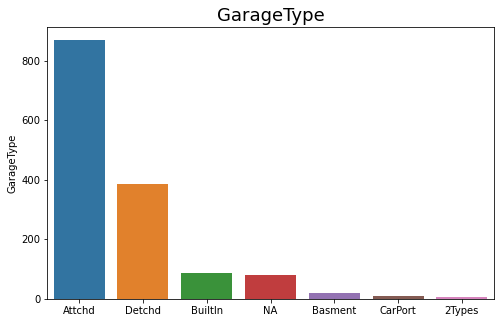

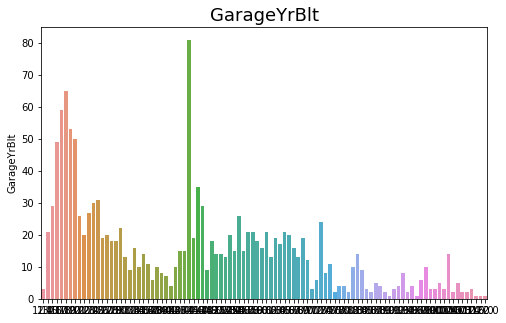

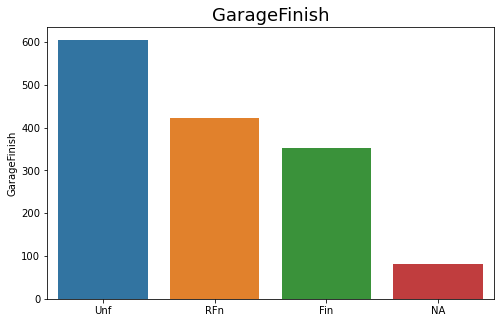

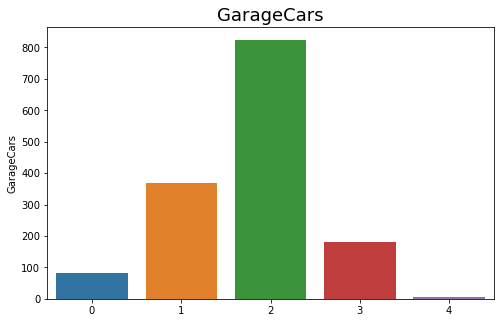

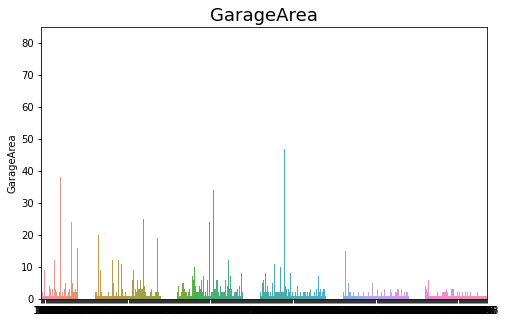

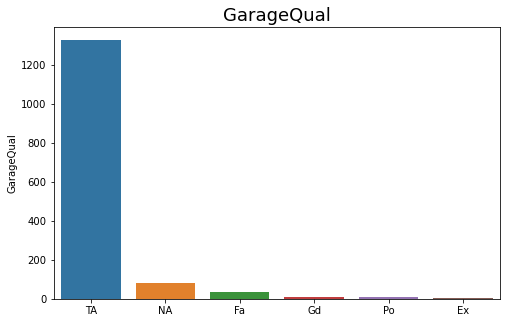

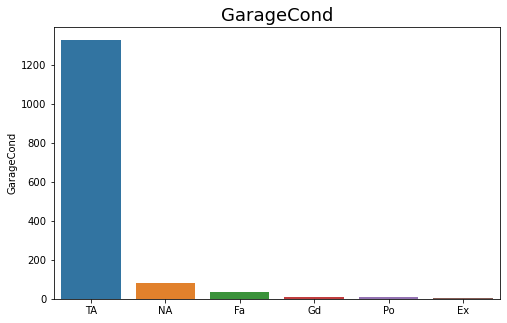

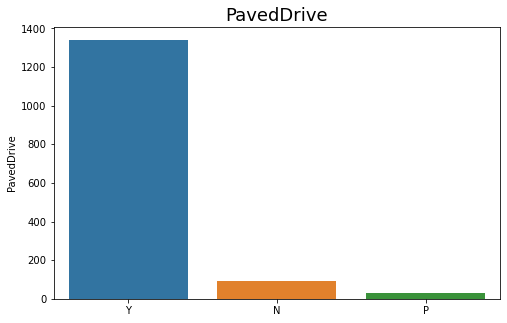

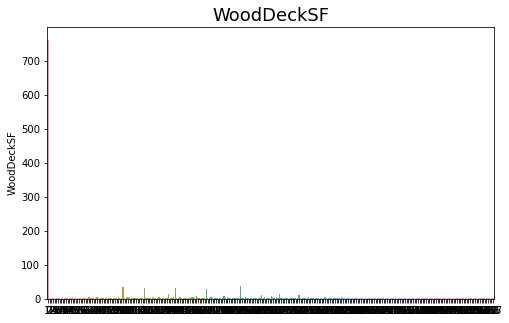

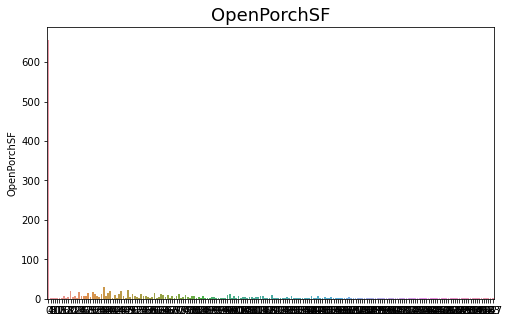

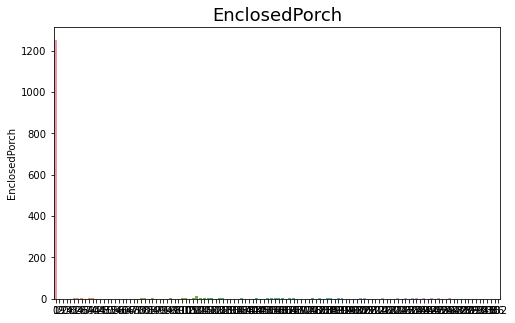

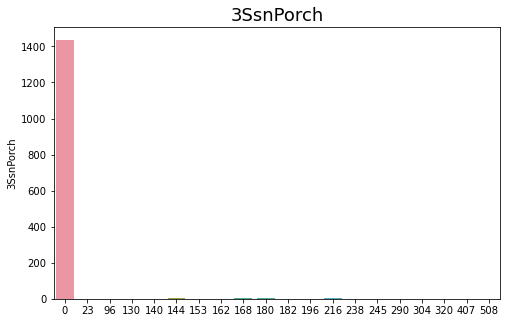

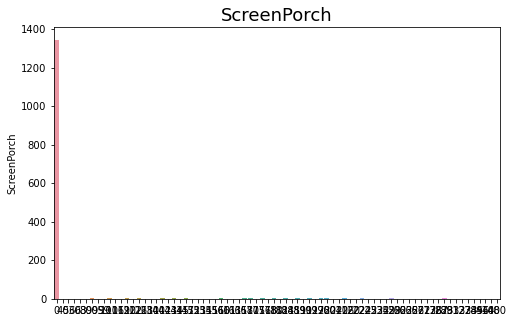

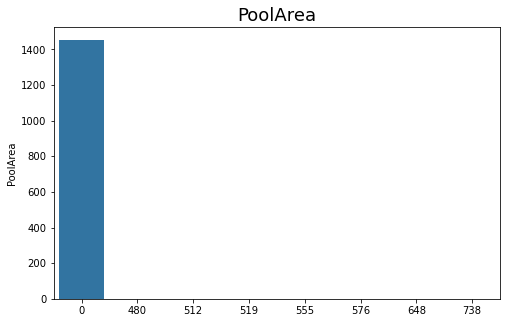

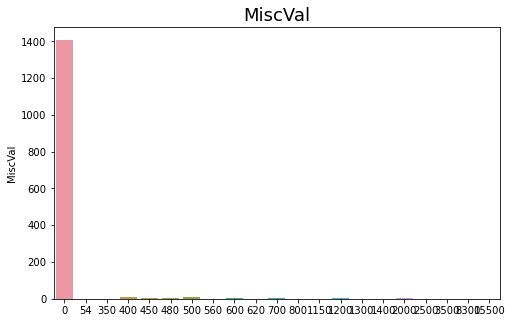

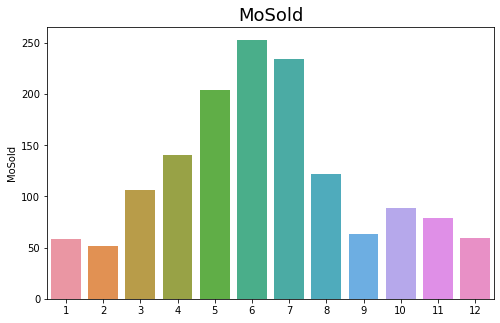

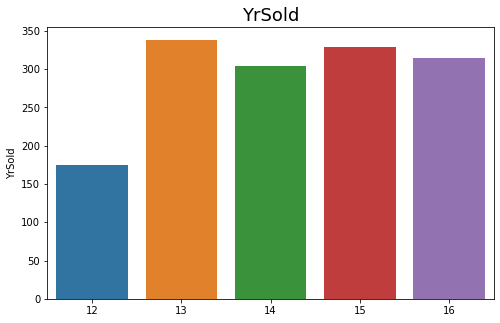

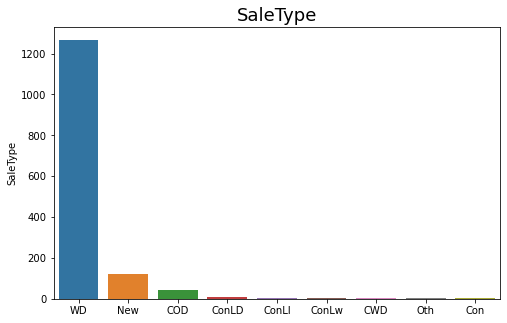

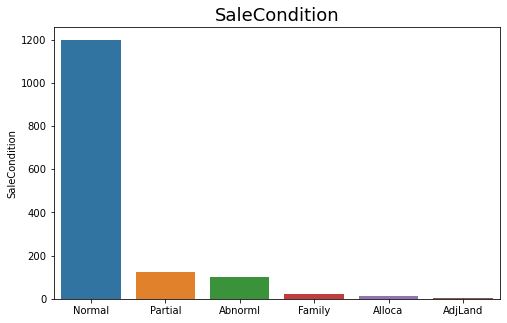

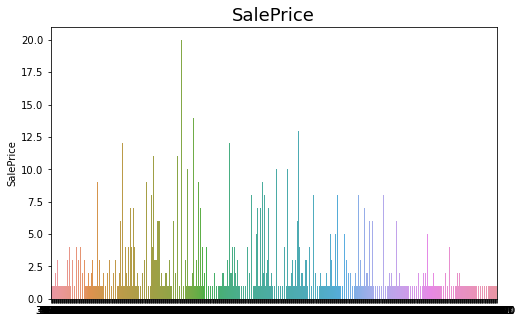

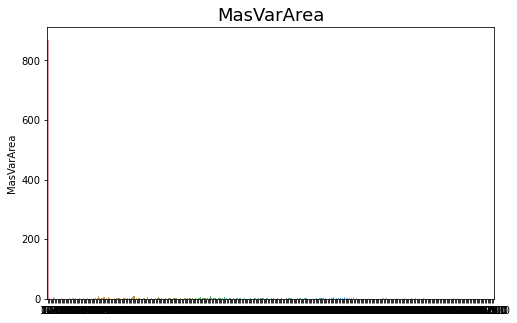

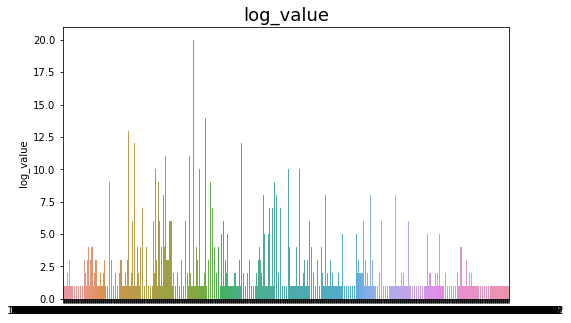

In [84]:
## Visualizing the levels of categorical columns using bar plots
for col in housing.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(housing[col].value_counts().index, housing[col].value_counts())
    plt.show()

In [63]:
##Data exploration: we need to make pairs of all independent vatiables
housing_numeric = housing.select_dtypes(include=['float', 'int64'])
housing_numeric.head()


,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MasVarArea,log_value
0,706,0,150,856,856,854,0,1710,1,0,...,0,0,0,0,0,2,14,208500,196.0,12.247694
1,978,0,284,1262,1262,0,0,1262,0,1,...,0,0,0,0,0,5,15,181500,0.0,12.109011
2,486,0,434,920,920,866,0,1786,1,0,...,0,0,0,0,0,9,14,223500,162.0,12.317167
3,216,0,540,756,961,756,0,1717,1,0,...,272,0,0,0,0,2,16,140000,0.0,11.849398
4,655,0,490,1145,1145,1053,0,2198,1,0,...,0,0,0,0,0,12,14,250000,350.0,12.429216


In [64]:
housing['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [65]:
housing['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

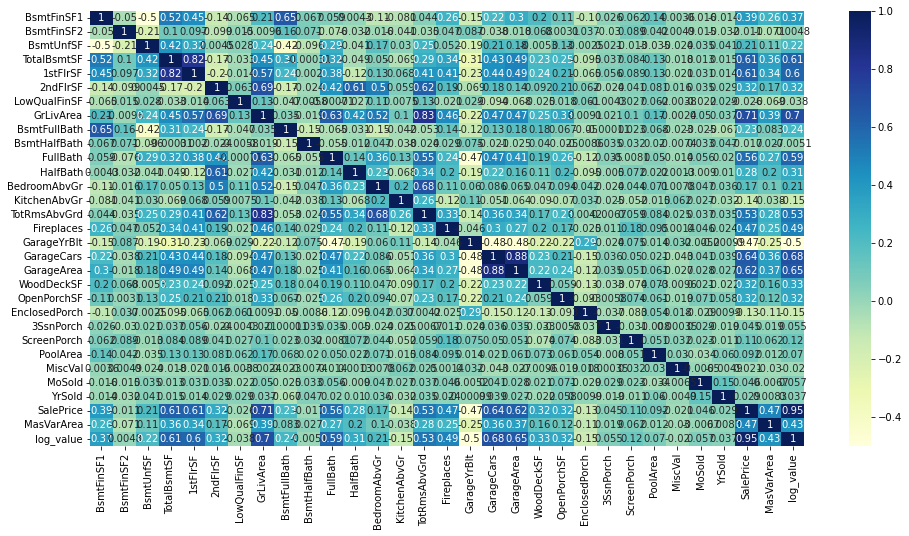

In [66]:
#Find correalation matrix
cor = housing_numeric.corr()

plt.figure(figsize=(16,8))

sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

In [67]:
cor*100

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MasVarArea,log_value
BsmtFinSF1,100.000000,-5.011740,-49.525147,52.239605,44.586266,-13.707899,-6.450260,20.817113,64.921175,6.741848,...,-10.230331,2.645051,6.202062,14.049129,0.357147,-1.572695,-1.435892,38.641981,26.125605,37.202307
BsmtFinSF2,-5.011740,100.000000,-20.929449,10.480954,9.711745,-9.926032,1.480700,-0.963989,15.867806,7.094813,...,3.654334,-2.999340,8.887125,4.170905,0.493978,-1.521074,-3.170564,-1.137812,-7.132963,0.483241
BsmtUnfSF,-49.525147,-20.929449,100.000000,41.535961,31.798744,0.446909,2.816669,24.025727,-42.290048,-9.580429,...,-0.253785,2.076401,-1.257927,-3.509224,-2.383665,3.488844,4.125819,21.447911,11.386216,22.198505
TotalBsmtSF,52.239605,10.480954,41.535961,100.000000,81.952998,-17.451195,-3.324539,45.486820,30.735055,-0.031458,...,-9.547774,3.738373,8.448899,12.605313,-1.847892,1.319618,1.496865,61.358055,36.006737,61.213398
1stFlrSF,44.586266,9.711745,31.798744,81.952998,100.000000,-20.264618,-1.424067,56.602397,24.467110,0.195565,...,-6.529170,5.610437,8.875807,13.152498,-2.109572,3.137156,1.360377,60.585218,33.985041,59.698105
2ndFlrSF,-13.707899,-9.926032,0.446909,-17.451195,-20.264618,100.000000,6.335295,68.750106,-16.949395,-2.385478,...,6.198869,-2.435765,4.060645,8.148688,1.619687,3.516443,2.869991,31.933380,17.380000,31.929998
LowQualFinSF,-6.450260,1.480700,2.816669,-3.324539,-1.424067,6.335295,100.000000,13.468281,-4.714342,-0.584150,...,6.108124,-0.429561,2.679941,6.215737,-0.379287,-2.217396,2.892088,-2.560613,-6.862798,-3.796280
GrLivArea,20.817113,-0.963989,24.025727,45.486820,56.602397,68.750106,13.468281,100.000000,3.483605,-1.891848,...,0.911321,2.064319,10.151040,17.020534,-0.241564,5.023968,3.652582,70.862448,38.805205,70.092665
BsmtFullBath,64.921175,15.867806,-42.290048,30.735055,24.467110,-16.949395,-4.714342,3.483605,100.000000,-14.787096,...,-4.991065,-0.010609,2.314773,6.761556,-2.304702,-2.536089,-6.704914,22.712223,8.301005,23.622411
BsmtHalfBath,6.741848,7.094813,-9.580429,-0.031458,0.195565,-2.385478,-0.584150,-1.891848,-14.787096,100.000000,...,-0.855533,3.511363,3.212141,2.002463,-0.736652,3.287271,4.652388,-1.684415,2.740266,-0.514909


# Data Preparation


In [68]:
housing.columns

Index(['Utilities', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'MasVarArea', 'log_value'],
      dtype='object')

In [69]:
#Split x and Y variables

X = housing.loc[:, [ 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold']]

y = housing['MasVarArea']

In [70]:
#creating dummy variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,Gd,PConc,Gd,No,GLQ,Ex,Gd,NA,Attchd,RFn
1,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [71]:
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,...,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0


In [72]:
#Drop dummy variables
X = X.drop(list(housing_categorical.columns), axis=1)


In [73]:
X = pd.concat([X, housing_dummies], axis=1)


In [74]:
print(housing)

     Utilities Condition2 BldgType RoofStyle RoofMatl ExterQual ExterCond  \
0       AllPub       Norm     1Fam     Gable  CompShg        Gd        TA   
1       AllPub       Norm     1Fam     Gable  CompShg        TA        TA   
2       AllPub       Norm     1Fam     Gable  CompShg        Gd        TA   
3       AllPub       Norm     1Fam     Gable  CompShg        TA        TA   
4       AllPub       Norm     1Fam     Gable  CompShg        Gd        TA   
...        ...        ...      ...       ...      ...       ...       ...   
1455    AllPub       Norm     1Fam     Gable  CompShg        TA        TA   
1456    AllPub       Norm     1Fam     Gable  CompShg        TA        TA   
1457    AllPub       Norm     1Fam     Gable  CompShg        Ex        Gd   
1458    AllPub       Norm     1Fam       Hip  CompShg        TA        TA   
1459    AllPub       Norm     1Fam     Gable  CompShg        Gd        TA   

     Foundation BsmtQual BsmtCond  ... ScreenPorch PoolArea  MiscVal MoSold

In [75]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the dataframe is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NA',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_NA',
       'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ',
       'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf',
       'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Fa',
       'FireplaceQu_Gd', 'FireplaceQu_NA', 'FireplaceQu_Po', 'FireplaceQu_TA',
       'GarageType_Attchd', 'GarageType_Basment', 'Gara

In [76]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.3,
                                                    test_size = 0.1, random_state=100)

NameError: name 'Y' is not defined

# Ridge and Lasso Regression

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

housing[housing==np.inf]=np.nan
housing.fillna(housing.mean(), inplace=True)


In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

In [ ]:
cv_results


In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
#Using the best hyper parameter in the ridge Regression
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

# Predict Y variables

In [ ]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
list(zip(cols, model_parameters))

In [ ]:
alpha_double = 200
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train, y_train)
ridge_double.coef_

In [ ]:
y_train_pred_double = ridge_double.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))

In [ ]:
rsquare = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double)
rssbytss = 1-rsquare
rssbytss

In [ ]:
y_test_pred = ridge_double.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

In [ ]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge_double.coef_)
ridge_doble_list = list(zip(cols, model_parameters))

In [ ]:
ridge_doble_list


In [ ]:
final_pred_ridge_double =[]
for i in range(len(ridge_doble_list)):
    if(ridge_doble_list[i][1]!=0):
        final_pred_ridge_double.append(ridge_doble_list[i][0])
print('Number of predictors selected by double the optimal alpha for ridge are:{0}'.format(len(final_pred_ridge_double)))

## LASSO REGRESSION ##

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]}


lasso = Lasso()

# cross validation
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train, y_train) 

In [ ]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso.head()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train) 

In [ ]:
lasso.coef_


In [ ]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [ ]:
lasso_list


In [ ]:
final_pred_lasso =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_pred_lasso.append(lasso_list[i][0])
print('Number of predictors selected by optimaloptimal alpha for ridge are:{0}'.format(len(final_pred_lasso)))

# Remove highest contributors

In [ ]:
lm_double = Lasso(alpha=0.002)
lm_double.fit(X_train, y_train)

# predict
y_train_pred_double = lm_double.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))
y_test_pred_double = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_double))

In [ ]:
model_parameters = list(lm_double.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lm_double.coef_)
a = list(zip(cols, model_parameters))
#List of all predictors with non zero co-efficients

final_pred =[]
for i in range(len(a)):
    if(a[i][1]!=0):
        final_pred.append(a[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_pred)))

In [ ]:
a

In [ ]:
d = len(final_pred)

In [ ]:
d

In [ ]:
n = len(X)


In [ ]:
X_train_new = X_train.drop([ 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'FireplaceQu_TA', 'GarageType_CarPort'], axis=1)


In [ ]:
X_test_new = X_test.drop([ 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'FireplaceQu_TA', 'GarageType_CarPort'], axis=1)


In [ ]:
X_train_new.columns


In [ ]:
model_lasso_cv.fit(X_train_new, y_train)


In [ ]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
print("\n The best estimator across ALL searched params:\n",
          model_lasso_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_lasso_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_lasso_cv.best_params_)

In [ ]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_new, y_train) 

In [ ]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_new)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

In [ ]:
final_lasso_new_pred =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_lasso_new_pred.append(lasso_list[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_lasso_new_pred)))